<a href="https://colab.research.google.com/github/Yeonseo-Jo/Class2022Spring/blob/main/(16-2)%20pytorch_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [Pytorch Hub](https://pytorch.org/hub/research-models)

* Pytorch : facebook에서 제공하는 AI(NN) 관련 패키지
* Pytorch Hub: facebook에서 자체적으로 훈련한 AI model을 제공하는 사이트
<br/>

* pytorch는 연구용도로 많이 사용

> image generation (e.g. [PGAN](https://pytorch.org/hub/facebookresearch_pytorch-gan-zoo_pgan/))
<br/>

* PGAN : celebrity face를 새롭게 만드는 모델 

In [1]:
import torch
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'PGAN', model_name='celebAHQ-512', pretrained=True)    #PGAN 알고리즘 모델을 불러오기

Downloading: "https://github.com/facebookresearch/pytorch_GAN_zoo/archive/hub.zip" to /root/.cache/torch/hub/hub.zip
Downloading: "https://dl.fbaipublicfiles.com/gan_zoo/PGAN/celebaHQ16_december_s7_i96000-9c72988c.pth" to /root/.cache/torch/hub/checkpoints/celebaHQ16_december_s7_i96000-9c72988c.pth


  0%|          | 0.00/264M [00:00<?, ?B/s]

Average network found !


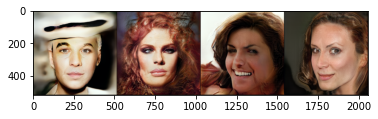

In [2]:
num_images = 4
noise, _ = model.buildNoiseData(num_images)
with torch.no_grad():
    generated_images = model.test(noise)            #model이 noise를 넣으면 얼굴을 random하게 만들도록 훈련되었으므로 noise를 input으로 넣어줌

# let's plot these images using torchvision and matplotlib
import matplotlib.pyplot as plt
import torchvision
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True)
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())